In [1]:
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from datetime import datetime
# from tqdm.notebook import tqdm,trange
import warnings
warnings.filterwarnings("ignore") 
logging.getLogger('matplotlib.font_manager').disabled = True

In [14]:
def nameToIndexDict(l_unique_names):
# create name to index dictionary and index to name dictionary for later use
# returns (name2id, id2name)
    name2id = {}
    for idx,name in enumerate(l_unique_names):    # unique_names
        name2id[name] = idx

    id2name = {}
    for idx, name in enumerate(l_unique_names):
        id2name[idx] = name

    return name2id, id2name

In [13]:
def standardize_triplet(l, to_type=tuple):
    try:
        if type(l[0][0]) == str:
            for i in range(len(l)):
                l[i] = to_type(l[i])
        else:
            for i in range(len(l)):
                for j in range(len(l[i])):
                    l[i][j] = to_type(l[i][j])
    except:
        pass
    return l

In [2]:
df_email = pd.read_csv('output7_new_sentiment.csv',index_col = 0)
from_list = df_email['From'].values.tolist()
for i in range(len(from_list)):
    from_list[i] = eval(from_list[i])
df_email['From'] = from_list

to_list = df_email['To'].values.tolist()
for i in range(len(to_list)):
    to_list[i] = eval(to_list[i])
df_email['To'] = to_list

cc_list = df_email['CC'].values.tolist()
for i in range(len(cc_list)):
    cc_list[i] = eval(cc_list[i])
df_email['CC'] = cc_list

df_email


,From,Sent,To,CC,Subject,Attachments,Importance,Body,textblob_sentiment,nltk_sentiment,flair_sentiment,GCP_sentiment
0,"(cindy, dick, cynthia.dick@talgov.com)",2011-08-18 12:12:00,"[(fire, department, fire_department)]",[],[],[],[],['I recently came across this quote and reflec...,"[0.275, 0.39583333333333337]","[0.0, 0.149, 0.701, 0.149]",POSITIVE (0.9575),"[0.30000001192092896, 1.7999999523162842, 0.02..."
1,"(mark, decarlo, mark.decarlo@talgov.com)",2011-08-20 03:44:00,"[(fire, department, fire_department)]",[],[],[],[],[''],"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",empty body,"[0.0, 0.0, 0.0]"
2,"(deborah, heiter, deborah.heiter@talgov.com)",2012-01-20 16:41:00,"[(bill, behenna, bill_behenna), (cathy, branch...",[],[],[],[],"['', 'Deborah L. Heiter', 'Administrative Spec...","[0.07253787878787879, 0.3424242424242424]","[0.9318, 0.0, 0.93, 0.07]",POSITIVE (0.8154),"[0.0, 2.799999952316284, 0.009523809361620015]"
3,"(beth, kirkland, bkirkland@taledc.com)",2012-01-23 09:32:00,"[(f496, l496, llaubscher@eflorida.com)]","[(f18020, l18020, brook.pace@deo.myflorida.com...",[],[],[],"['Louis,', 'Thank you for meeting with us in F...","[0.012500000000000011, 0.36944444444444446]","[0.9599, 0.021, 0.847, 0.132]",POSITIVE (0.9031),"[0.20000000298023224, 2.799999952316284, 0.010..."
4,"(vida, addison, vida.addison@talgov.com)",2012-02-07 15:19:00,"[(gary yordon' no, they have not told me anyth...",[],[],[],[],"['Hello, Do you have a 4meline for when a deci...","[0.021875000000000006, 0.403125]","[0.8708, 0.0, 0.879, 0.121]",NEGATIVE (0.9894),"[0.0, 0.6000000238418579, 0.0052631581038759465]"
...,...,...,...,...,...,...,...,...,...,...,...,...
21809,"(gina, fletcher, gfletcher@leonpa.org)",2017-09-26 11:12:00,"[(vince, long, longv@leoncountyfl.gov), (rick,...","[(f22301, l22301, rosss@leoncountyfl.gov), (f2...",[],[],"[""High Good morning, everyone! I have been c...",[],"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",empty body,"[0.0, 0.0, 0.0]"
21810,"(alison, faris, alison.faris@talgov.com)",2017-09-26 11:20:00,"[(suzanne, hughes, suzanneh@floridarealtors.org)]","[(paige, carter-smith, paige.tallahasseedownto...",[],[],[],"['', 'Thanks for leqng us know about your plan...","[0.2333333333333333, 0.4000000000000001]","[0.9001, 0.0, 0.842, 0.158]",POSITIVE (0.9654),"[0.10000000149011612, 2.200000047683716, 0.028..."
21811,"(suzanne, hughes, suzanneh@floridarealtors.org)",2017-09-26 13:41:00,"[(alison, faris, afaris@comcast.net)]","[(paige, carter-smith, paige.tallahasseedownto...",[],[],[],"['', '', 'Great! And yes, wed love to let eve...","[0.625, 0.5166666666666667]","[0.9421, 0.0, 0.377, 0.623]",POSITIVE (0.9982),"[0.800000011920929, 2.5999999046325684, 0.1529..."
21812,"(edward, kring, edward.kring@talgov.com)",2017-09-26 17:48:00,"[(suzanne, hughes, suzanneh@floridarealtors.or...","[(paige, carter-smith, paige.tallahasseedownto...",[],[],[],"['', 'HI Suzanne I hope this nds you well. Pl...","[-0.75, 1.0]","[0.891, 0.0, 0.741, 0.259]",POSITIVE (0.8982),"[0.10000000149011612, 0.800000011920929, 0.014..."


In [3]:
total_list = [('scoi', 'maddox', 'scoi.maddox@talgov.com'),
              ('scott', 'maddox', 'maddox@maddoxhorne.com'),
              ('scott', 'mattox', 'scott@govinc.net'),
              ('scott', 'maddox', 'scottcharlesmaddox@gmail.com'),
              ('scott', 'maddox', 'scott@scottmaddox.com'),
              ('scott', 'maddox', 'shamaddox@embarqmail.com'),
              ('scott', 'maddox', 'scott.maddox@talgov.com'),
              ('scof', 'maddox', 'scof.maddox@talgov.com'),
              ('scos', 'maddox', 'scos.maddox@talgov.com'),
              ('sha', 'maddox', 'sha_maddox'),]

In [5]:
# find person related emails
keep_idx=[]
for i in range(len(from_list)):
    for j in range(len(total_list)):
        if total_list[j] == from_list[i] :
            keep_idx.append(i)
            break
        for t in to_list[i]:
            if total_list[j] == t:
                keep_idx.append(i)
                break
        for cc in cc_list[i]:
            if total_list[j] == cc:
                keep_idx.append(i)
                break
len(keep_idx)

3148

In [6]:
df_related_emails = df_email.iloc[keep_idx]
df_related_emails = df_related_emails.reset_index(drop=True)
df_related_emails

,From,Sent,To,CC,Subject,Attachments,Importance,Body,textblob_sentiment,nltk_sentiment,flair_sentiment,GCP_sentiment
0,"(diana, oropallo, doropallo@comcast.net)",2012-04-02 22:07:00,"[(sheila, costigan, costigans@leonschools.net)...","[("", "", , "", ""_ )]",[],[],[],"['Just to piggy back on Sheilas email, your at...","[0.18214285714285716, 0.4107142857142857]","[0.9778, 0.0, 0.818, 0.182]",POSITIVE (0.8923),"[0.4000000059604645, 4.5, 0.02601156069364162]"
1,"(sheila, costigan, costigans@leonschools.net)",2012-04-04 14:12:00,"[(leslie, smith, lesliehsmith@gmail.com), (adm...",[],['March Executive Director Report'],['FLCS.EX.DIR.report.March.2012.docx; STOMP.CO...,[],"['REPORT.docx', 'Dear BOD, please find attache...","[0.16754086727666279, 0.40936088154269956]","[0.9993, 0.005, 0.827, 0.168]",POSITIVE (0.9924),"[0.20000000298023224, 17.299999237060547, 0.01..."
2,"(sheila, costigan, costigans@leonschools.net)",2012-04-09 15:05:00,"[(leslie, smith, lesliehsmith@gmail.com), (adm...","[(courtney, atkins, courtney@uwbb.org), (f1802...",[],[],[],"['Everyone, please find the latest edition of ...","[0.3422664141414142, 0.548989898989899]","[0.9874, 0.011, 0.822, 0.167]",NEGATIVE (0.7968),"[0.20000000298023224, 6.099999904632568, 0.023..."
3,"(sheila, costigan, costigans@leonschools.net)",2012-04-26 11:35:00,"[(administration-thomas, harrison, administrat...",[],[],[],[],"['', 'Please attend this years awesome new Bui...","[0.4909090909090909, 0.5220779220779221]","[0.9738, 0.0, 0.74, 0.26]",POSITIVE (0.9764),"[0.4000000059604645, 2.200000047683716, 0.0250..."
4,"(linda, recio, linda@consultevergreen.com)",2012-04-26 11:54:00,"[(sheila, costigan, costigans@leonschools.net)...",[],[],[],[],['This sounds like a great opportunity for all...,"[0.5333333333333333, 0.6166666666666667]","[0.9269, 0.0, 0.666, 0.334]",POSITIVE (0.9726),"[0.20000000298023224, 1.2000000476837158, 0.02..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3143,"(paul, lamaster, paullamaster250@comcast.net)",2017-08-31 06:44:00,"[(william, hatfield, whatfield@tallahassee.com...",[],[],[],[],"['', 'Follow the link below to view the articl...","[0.1, 0.525]","[0.434, 0.051, 0.809, 0.14]",NEGATIVE (0.7661),"[-0.10000000149011612, 1.100000023841858, 0.02..."
3144,"(paul, lamaster, paullamaster250@comcast.net)",2017-08-31 08:50:00,"[(william, haqield, whaqield@tallahassee.com),...",[],[],[],[],"['IT IS ON US. WE OWN IT.', 'THE 84 THOUSAND ...","[-0.13333333333333333, 0.7000000000000001]","[-0.9697, 0.312, 0.688, 0.0]",POSITIVE (0.9966),"[-0.10000000149011612, 1.7999999523162842, 0.0..."
3145,"(edward, holifield, ewholifield@yahoo.com)",2017-09-01 01:26:00,"[(raymond, bellamy, raymond_bellamy)]","[(paul, lamaster, paullamaster250@comcast.net)...",[],[],[],"['', 'Ray,', 'You have got to be kidding. HBCU...","[-0.027254901960784304, 0.40274509803921577]","[0.3167, 0.043, 0.889, 0.068]",NEGATIVE (1.0),"[-0.20000000298023224, 5.900000095367432, 0.04..."
3146,"(paul, lamaster, paullamaster250@comcast.net)",2017-09-01 08:03:00,"[(raymond, bellamy, raymond_bellamy)]","[(edward, holifield, ewholifield@yahoo.com), (...",[],[],[],"['Article', '', 'A collection of quantitative ...","[0.048589065255731916, 0.4608465608465607]","[-0.9956, 0.219, 0.705, 0.075]",NEGATIVE (0.9129),"[-0.30000001192092896, 18.5, 0.04322429906542056]"


In [7]:
from_list = df_related_emails['From'].values.tolist()
to_list = df_related_emails['To'].values.tolist()
cc_list = df_related_emails['CC'].values.tolist()


from_list = standardize_triplet(from_list)
to_list = standardize_triplet(to_list)
cc_list = standardize_triplet(cc_list)

In [8]:
num_TO = []
num_TO = []
num_CC = []
num_TO_CC = []
for i in range(len(to_list)):
    num_TO.append(len(to_list[i]))
    num_CC.append(len(cc_list[i]))
    num_TO_CC.append(len(to_list[i]) + len(cc_list[i]))
df_related_emails['num_TO'] = num_TO
df_related_emails['num_CC'] = num_CC
df_related_emails['num_TO_CC'] = num_TO_CC

In [9]:
unique_people = set()
for i in range(len(from_list)):
    unique_people.add(from_list[i])

for i in range(len(cc_list)):
    for lst in cc_list[i]:
        unique_people.add(lst)

for i in range(len(to_list)):
    for lst in to_list[i]:
        unique_people.add(lst)
unique_people = list(unique_people)
unique_people.sort()
name2id, id2name = nameToIndexDict(unique_people)

len(unique_people)


11292

In [10]:
date_email = pd.to_datetime(df_related_emails['Sent'])
month = date_email.dt.month
year = date_email.dt.year

In [11]:
idxes = []
time_labels = []
tickcolors = ['green', 'blue', 'red', 'orange']
color = tickcolors[0]
time_labels_for_tickcolor = {}
skip = True # some month in the middle is empty, so I use a skip flag to skip the first several month but keep the middle ones
for y in range(2012,2018):
    for m in range(1,13):
        idx = (year == y) * (month == m)
        if idx.sum() == 0 and skip == True:
            continue
        else:
            skip = False
            
            idxes.append(np.array(idx))
            label = str(y)+'.'+str(m)
            time_labels.append(label)
            time_labels_for_tickcolor[label] = color
            if label == '2014.1':
                color = tickcolors[1]
            elif label == '2014.5':
                color = tickcolors[2]
            elif label == '2016.2':
                color = tickcolors[3]
                
for i,idx in enumerate(idxes[::-1]): # remove the empty months in the end
    if idx.sum() != 0:
        break
idxes = idxes[:-i]
time_labels = time_labels[:-i]

In [18]:
# 
centrality = np.zeros((len(idxes),23))
email_adj_mat = None

# for k in range(len(idxes)):
for k in trange(len(idxes)):
    
    # build adjmat
    df_temp = df_related_emails.iloc[idxes[k]]
    num_email = len(df_temp)
    if num_email == 0:
        continue
    email_adj_mat = np.zeros((len(unique_people),len(unique_people)))

    from_list = df_temp['From'].values.tolist()
    to_list = df_temp['To'].values.tolist()
    cc_list = df_temp['CC'].values.tolist()
    num_TO_CC = df_temp['num_TO_CC'].values.tolist()

    for i in range(len(from_list)):
        s = name2id[from_list[i]] # id of the sender
        
        rs = to_list[i]
        for j in range(len(rs)):
            if rs[j] != ('', '', '') and rs[j] != ['', '', '']:
                r = name2id[rs[j]]  # id of the receiver
                email_adj_mat[s,r] += 1/num_TO_CC[i]
        cs = cc_list[i]
        for j in range(len(cs)):
            if cs[j] != ('', '', '') and cs[j] != ['', '', '']:
                r = name2id[cs[j]]  # id of the receiver
                email_adj_mat[s,r] += 1/num_TO_CC[i]
    
#     email_adj_mat = email_adj_mat + email_adj_mat.T
#     email_adj_mat = np.triu(email_adj_mat, 1)
    email_adj_mat = email_adj_mat/email_adj_mat.max() # normalize. the widest edge has fix width
    
    # build graph from numpy array email_adj_mat
    G = nx.from_numpy_array(email_adj_mat, create_using=nx.DiGraph)
    
    idc = np.array(list(nx.centrality.in_degree_centrality(G).values()))
    centrality[k,0] = idc.min()
    centrality[k,1] = idc.mean()
    centrality[k,2] = idc.max()
    centrality[k,3] = idc.std()
    
    odc = np.array(list(nx.centrality.out_degree_centrality(G).values()))
    centrality[k,4] = odc.min()
    centrality[k,5] = odc.mean()
    centrality[k,6] = odc.max()
    centrality[k,7] = odc.std()

    dc = np.array(list(nx.centrality.degree_centrality(G).values()))
    centrality[k,8] = dc.min()
    centrality[k,9] = dc.mean()
    centrality[k,10] = dc.max()
    centrality[k,11] = dc.std()
    
    bc = np.array(list(nx.centrality.betweenness_centrality(G).values()))
    centrality[k,12] = bc.min()
    centrality[k,13] = bc.mean()
    centrality[k,14] = bc.max()
    centrality[k,15] = bc.std()
    
    cc = np.array(list(nx.centrality.closeness_centrality(G).values()))
    centrality[k,16] = cc.min()
    centrality[k,17] = cc.mean()
    centrality[k,18] = cc.max()
    centrality[k,19] = cc.std()
    # https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.size.html
    centrality[k,20] = G.size()  # if not provide weight, it's the number of edges. 
    centrality[k,21] = G.size(weight = 'weight')  
    
    centrality[k,22] = ((email_adj_mat.sum(axis=0) != 0) * (email_adj_mat.sum(axis=1) != 0)).sum() # number of active nodes
    
    email_adj_mat = None # will have memory problem if the matrix is too big, set to None to free momery before next iteration


In [179]:
np.save('centrality', centrality)

# plot
## betweenness

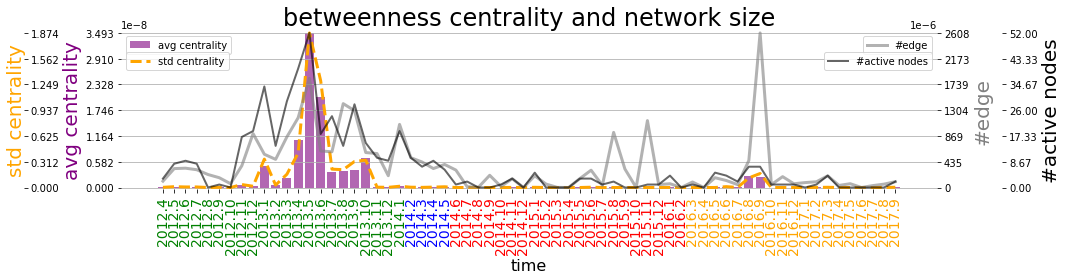

In [224]:
fig, ax1 = plt.subplots(figsize = (15,4))

x = centrality[:,13]
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_title('betweenness centrality and network size', fontsize = 24)
ax1.bar(np.arange(len(idxes)), x, label = 'avg centrality', alpha = 0.6, color = 'purple')
ax1.legend(loc=2)
# the range is too large
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,10], y2 = centrality[:,8], color = 'red', alpha = 0.3)
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,9] + centrality[:,11], y2 = centrality[:,9] - centrality[:,11], color = 'red', alpha = 0.3)
ax1.set_xticks(np.arange(len(idxes)))
ax1.set_xticklabels(time_labels, rotation = 90, fontsize = 14)
ax1.set_xlabel('time', fontsize = 16)
ax1.set_ylabel('avg centrality', color='purple', fontsize = 20)
ax1.set_yticks(np.linspace(x.min(), x.max(), 7))
ax1.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
for ticklabel in plt.gca().get_xticklabels():
    ticklabel.set_color(time_labels_for_tickcolor[ticklabel.get_text()])
ax1.grid(axis = 'y')

x = centrality[:,15]
ax2 = ax1.twinx()
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines["right"].set_position(("axes", -0.12))
ax2.plot(x ,label = 'std centrality', c = 'orange', linewidth = 3, ls = 'dashed')
ax2.set_ylabel('std centrality', color='orange', fontsize = 20, x = -1.2, y = 0.5)
ax2.yaxis.set_label_coords(-0.14 ,0.5) 
ax2.set_yticks(np.linspace(x.min(), x.max(), 7))
ax2.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax2.legend(loc=2, bbox_to_anchor=(0.0,0.9))

x = centrality[:,20]
ax3 = ax1.twinx()
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.plot(x, label = '#edge', c = 'gray', linewidth = 3, alpha = 0.6)
ax3.set_ylabel('#edge', color='gray', fontsize = 20)
ax3.set_yticks(np.linspace(x.min(), x.max(), 7))
ax3.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax3.legend(loc=1)


x = centrality[:,22]
ax4 = ax1.twinx()
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines["right"].set_position(("axes", 1.08))
ax4.plot(x, label = '#active nodes', c = 'black', linewidth = 2, alpha = 0.6)
ax4.set_ylabel('#active nodes', color='black', fontsize = 20, x = 1.2, y = 0.5)
ax4.set_yticks(np.linspace(x.min(), x.max(), 7))
ax4.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax4.legend(loc=1, bbox_to_anchor=(1.0,0.9))

plt.tight_layout()
plt.show()

## closeness centrality

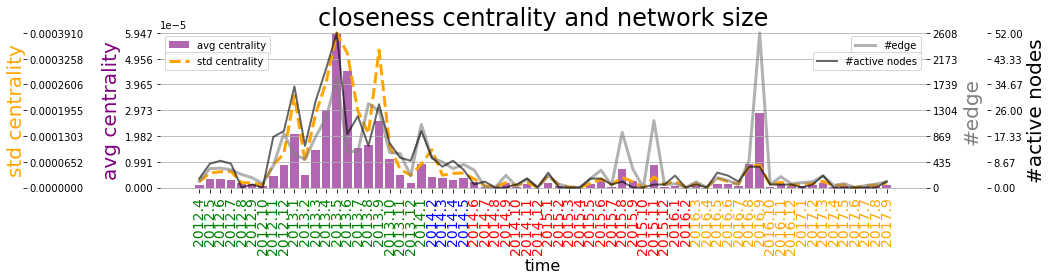

In [225]:
fig, ax1 = plt.subplots(figsize = (15,4))

x = centrality[:,17]
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_title('closeness centrality and network size', fontsize = 24)
ax1.bar(np.arange(len(idxes)), x, label = 'avg centrality', alpha = 0.6, color = 'purple')
ax1.legend(loc=2)
# the range is too large
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,10], y2 = centrality[:,8], color = 'red', alpha = 0.3)
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,9] + centrality[:,11], y2 = centrality[:,9] - centrality[:,11], color = 'red', alpha = 0.3)
ax1.set_yticks(np.linspace(x.min(), x.max(), 7))
ax1.set_xticks(np.arange(len(idxes)))
ax1.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax1.set_xticklabels(time_labels, rotation = 90, fontsize = 14)
ax1.set_xlabel('time', fontsize = 16)
ax1.set_ylabel('avg centrality', color='purple', fontsize = 20)
for ticklabel in plt.gca().get_xticklabels():
    ticklabel.set_color(time_labels_for_tickcolor[ticklabel.get_text()])
ax1.grid(axis = 'y')

x = centrality[:,19]
ax2 = ax1.twinx()
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines["right"].set_position(("axes", -0.18))
ax2.plot(x ,label = 'std centrality', c = 'orange', linewidth = 3, ls = 'dashed')
ax2.set_ylabel('std centrality', color='orange', fontsize = 20, x = -1.22, y = 0.5)
ax2.yaxis.set_label_coords(-0.2 ,0.5) 
ax2.set_yticks(np.linspace(x.min(), x.max(), 7))
ax2.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax2.legend(loc=2, bbox_to_anchor=(0.0,0.9))

x = centrality[:,20]
ax3 = ax1.twinx()
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.plot(x, label = '#edge', c = 'gray', linewidth = 3, alpha = 0.6)
ax3.set_ylabel('#edge', color='gray', fontsize = 20)
ax3.set_yticks(np.linspace(x.min(), x.max(), 7))
ax3.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax3.legend(loc=1)


x = centrality[:,22]
ax4 = ax1.twinx()
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines["right"].set_position(("axes", 1.08))
ax4.plot(x, label = '#active nodes', c = 'black', linewidth = 2, alpha = 0.6)
ax4.set_ylabel('#active nodes', color='black', fontsize = 20, x = 1.2, y = 0.5)
ax4.set_yticks(np.linspace(x.min(), x.max(), 7))
ax4.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax4.legend(loc=1, bbox_to_anchor=(1.0,0.9))

plt.tight_layout()
plt.show()

## degree

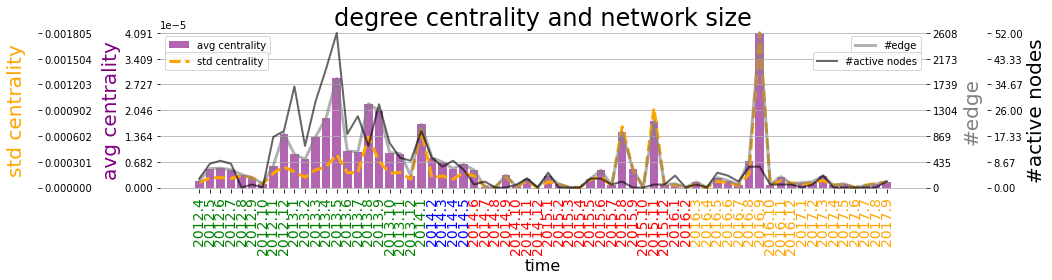

In [226]:
fig, ax1 = plt.subplots(figsize = (15,4))

x = centrality[:,9]
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_title('degree centrality and network size', fontsize = 24)
ax1.bar(np.arange(len(idxes)), x, label = 'avg centrality', alpha = 0.6, color = 'purple')
ax1.legend(loc=2)
# the range is too large
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,10], y2 = centrality[:,8], color = 'red', alpha = 0.3)
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,9] + centrality[:,11], y2 = centrality[:,9] - centrality[:,11], color = 'red', alpha = 0.3)
ax1.set_yticks(np.linspace(x.min(), x.max(), 7))
ax1.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax1.set_xticks(np.arange(len(idxes)))
ax1.set_xticklabels(time_labels, rotation = 90, fontsize = 14)
ax1.set_xlabel('time', fontsize = 16)
ax1.set_ylabel('avg centrality', color='purple', fontsize = 20)
for ticklabel in plt.gca().get_xticklabels():
    ticklabel.set_color(time_labels_for_tickcolor[ticklabel.get_text()])
ax1.grid(axis = 'y')

x = centrality[:,11]
ax2 = ax1.twinx()
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines["right"].set_position(("axes", -0.16))
ax2.plot(x ,label = 'std centrality', c = 'orange', linewidth = 3, ls = 'dashed')
ax2.set_ylabel('std centrality', color='orange', fontsize = 20, x = -1.16, y = 0.5)
ax2.yaxis.set_label_coords(-0.2 ,0.5) 
ax2.set_yticks(np.linspace(x.min(), x.max(), 7))
ax2.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax2.legend(loc=2, bbox_to_anchor=(0.0,0.9))

x = centrality[:,20]
ax3 = ax1.twinx()
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.plot(x, label = '#edge', c = 'gray', linewidth = 3, alpha = 0.6)
ax3.set_ylabel('#edge', color='gray', fontsize = 20)
ax3.set_yticks(np.linspace(x.min(), x.max(), 7))
ax3.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax3.legend(loc=1)


x = centrality[:,22]
ax4 = ax1.twinx()
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines["right"].set_position(("axes", 1.08))
ax4.plot(x, label = '#active nodes', c = 'black', linewidth = 2, alpha = 0.6)
ax4.set_ylabel('#active nodes', color='black', fontsize = 20, x = 1.2, y = 0.5)
ax4.set_yticks(np.linspace(x.min(), x.max(), 7))
ax4.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax4.legend(loc=1, bbox_to_anchor=(1.0,0.9))

plt.tight_layout()
plt.show()